In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time

from RPLB_acc_NoSTC_2D import RPLB_acc_NoSTC_2D
from RPLB_acc_NoSTCApril_2D import RPLB_acc_NoSTCApril_2D

4.03
20663942.414911874
35380644.65193536


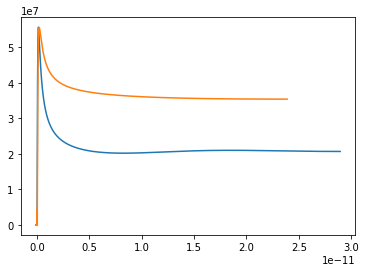

In [2]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

half_angle = 0.18*np.pi/4
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist
print('{0:.3g}'.format(1e6*w_0))

P = 100e12  # FL power
Psi_0 = 0.0*np.pi
t_0 = -10*tau_0

phi_2 = 0*(1e-15)**2  # Group Delay Dispersion s^2
z_0 = 0.000*(np.pi*w_0**2)/(lambda_0)  # collision position
r_0 = 0.0*w_0
beta_0 = 0.0

t, z, r, v_z, v_r, KE = RPLB_acc_NoSTC_2D(lambda_0, tau_0, w_0, P, Psi_0, phi_2, t_0, z_0, r_0, beta_0)
t_April, z, r, v_z, v_r, KE_April = RPLB_acc_NoSTCApril_2D(lambda_0, s, a, P, Psi_0, t_0, z_0, r_0, beta_0)

print(KE[-1])
print(KE_April[-1])

plt.plot(t, KE)
plt.plot(t_April, KE_April)

In [5]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

half_angle = 0.5*np.pi/4
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist

P = 1e12  # FL power
Psi_0 = 0.0*np.pi
t_0 = -10*tau_0

phi_2 = 0*(1e-15)**2  # Group Delay Dispersion s^2
z_0 = 0.000*(np.pi*w_0**2)/(lambda_0)  # collision position
r_0 = np.linspace(0, 0.2, 20)*w_0
beta_0 = 0.0

KE_final = np.zeros(len(r_0))
KE_final_April = np.zeros(len(r_0))

for i in range(0, len(r_0)):
    t, z, r, v_z, v_r, KE = RPLB_acc_NoSTC_2D(lambda_0, tau_0, w_0, P, Psi_0, phi_2, t_0, z_0, r_0[i], beta_0)
    t_April, z, r, v_z, v_r, KE_April = RPLB_acc_NoSTCApril_2D(lambda_0, s, a, P, Psi_0, t_0, z_0, r_0[i], beta_0)
    KE_final[i] = KE[-1]
    KE_final_April[i] = KE_April[-1]

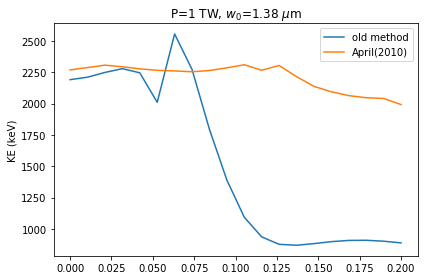

In [6]:
plt.plot(r_0/w_0, KE_final/1e3)
plt.plot(r_0/w_0, KE_final_April/1e3)
plt.legend(['old method', 'April(2010)'], loc=0)
plt.title('P='+'{0:.3g}'.format(P/1e12)+' TW, $w_0$='+'{0:.3g}'.format(1e6*w_0)+r' $\mu$m')
plt.ylabel('KE (keV)')
plt.tight_layout()